# ANALISIS E INSIGHTS

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Automcompletar rápido
%config IPCompleter.greedy=True

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

#Formato de graficos
sns.set_style('darkgrid')

## CARGA DE DATOS

In [2]:
df = pd.read_pickle('../Datos/df.pickle')
df.head()

planta  mes  mes  dia  dia  hora  hora  minuto  minuto  \
fecha                                                               
2020-05-15     p1    5    5   15   15     0     0       0       0   
2020-05-15     p1    5    5   15   15     0     0       0       0   
2020-05-15     p1    5    5   15   15     0     0       0       0   
2020-05-15     p1    5    5   15   15     0     0       0       0   
2020-05-15     p1    5    5   15   15     0     0       0       0   

                  sensor_id     irradiacion      t_ambiente        t_modulo  \
fecha                                                                         
2020-05-15  HmiyD2TTLFNqkNe            0.00           25.18           22.86   
2020-05-15  HmiyD2TTLFNqkNe            0.00           25.18           22.86   
2020-05-15  HmiyD2TTLFNqkNe            0.00           25.18           22.86   
2020-05-15  HmiyD2TTLFNqkNe            0.00           25.18           22.86   
2020-05-15  HmiyD2TTLFNqkNe            0.00           25.18           22.86   

                inverter_id           kw_dc           kw_ac      eficiencia  \
fecha                                                                         
2020-05-15  1BY6WEcLGh8j5v7            0.00            0.00            0.00   
2020-05-15  1IF53ai7Xc0U56Y            0.00            0.00            0.00   
2020-05-15  3PZuoBAID5Wc2HD            0.00            0.00            0.00   
2020-05-15  7JYdWkrLSPkdwr4            0.00            0.00            0.00   
2020-05-15  McdE0feGgRqW7Ca            0.00            0.00            0.00   

                    kw_dia        kw_total  
fecha                                       
2020-05-15            0.00      6259559.00  
2020-05-15            0.00      6183645.00  
2020-05-15            0.00      6987759.00  
2020-05-15            0.00      7602960.00  
2020-05-15            0.00      7158964.00

In [3]:
df_dia = pd.read_pickle('../Datos/df_dia.pickle')
df_dia.head()

i_r_r_a_d_i_a_c_i_o_n  t___a_m_b_i_e_n_t_e  t___m_o_d_u_l_o  \
min                    0.00                20.40            18.14   
mean                   0.23                26.76            31.92   
max                    1.22                39.18            66.64   
sum                     NaN                  NaN              NaN   

           k_w___d_c       k_w___a_c  e_f_i_c_i_e_n_c_i_a     k_w___d_i_a  \
min             0.00            0.00                 0.00             NaN   
mean         1708.37          274.79                25.57             NaN   
max         14471.12         1410.95               100.83         9873.00   
sum     233145211.30     37501176.21                  NaN             NaN   

      k_w___t_o_t_a_l  
min               NaN  
mean              NaN  
max     2247916295.00  
sum               NaN

## ANALISIS E INSIGHTS

La primera palanca es la recepción de la energía solar.

Tenemos 3 kpis con los que medir esta palanca: irradiación que llega, temperatura ambiente y temperatura del módulo.

Estos kpis se miden con un único sensor por planta, así que el dato es el mismo para todos los inverters.

Tenemos que entender cómo funcionan estas variables entre sí antes de pasar a ver cómo interactúan con el siguiente nivel.

Dado que da igual el inverter y solo necesitamos esas 3 variables vamos a crear un dataset más pequeño con solo un inverter de cada planta para trabajar sobre el.

In [4]:
df

planta  mes  mes  dia  dia  hora  hora  minuto  minuto  \
fecha                                                                        
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
...                    ...  ...  ...  ...  ...   ...   ...     ...     ...   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   

                           sensor_id     irradiacion      t_ambiente  \
fecha                                                                  
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
...                              ...             ...             ...   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   

                           t_modulo      inverter_id           kw_dc  \
fecha                                                                  
2020-05-15 00:00:00           22.86  1BY6WEcLGh8j5v7            0.00   
2020-05-15 00:00:00           22.86  1IF53ai7Xc0U56Y            0.00   
2020-05-15 00:00:00           22.86  3PZuoBAID5Wc2HD            0.00   
2020-05-15 00:00:00           22.86  7JYdWkrLSPkdwr4            0.00   
2020-05-15 00:00:00           22.86  McdE0feGgRqW7Ca            0.00   
...                             ...              ...             ...   
2020-06-17 23:45:00           22.54  q49J1IKaHRwDQnt            0.00   
2020-06-17 23:45:00           22.54  rrq4fwE8jgrTyWY            0.00   
2020-06-17 23:45:00           22.54  vOuJvMaM2sgwLmb            0.00   
2020-06-17 23:45:00           22.54  xMbIugepa2P7lBB            0.00   
2020-06-17 23:45:00           22.54  xoJJ8DcxJEcupym            0.00   

                              kw_ac      eficiencia          kw_dia  \
fecha                                                                 
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00            0.00         4157.00   
2020-06-17 23:45:00            0.00            0.00         3931.00   
2020-06-17 23:45:00            0.00            0.00         4322.00   
2020-06-17 23:45:00            0.00            0.00         4218.00   
2020-06-17 23:45:00            0.00            0.00         4316.00   

                           kw_total  
fecha                                
2020-05-15 00:00:00      6259559.00  
2020-05-15 00:00:00      6183645.00  
2020-05-15 00:00:00      6987759.00  
2020-05-15 00:00:

In [5]:
recepcion = df.loc[(df.inverter_id == '1BY6WEcLGh8j5v7') | (df.inverter_id == 'q49J1IKaHRwDQnt'), 'planta':'t_modulo']
recepcion

planta  mes  mes  dia  dia  hora  hora  minuto  minuto  \
fecha                                                                        
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:15:00     p1    5    5   15   15     0     0      15      15   
2020-05-15 00:30:00     p1    5    5   15   15     0     0      30      30   
2020-05-15 00:45:00     p1    5    5   15   15     0     0      45      45   
2020-05-15 01:00:00     p1    5    5   15   15     1     1       0       0   
...                    ...  ...  ...  ...  ...   ...   ...     ...     ...   
2020-06-17 22:45:00     p2    6    6   17   17    22    22      45      45   
2020-06-17 23:00:00     p2    6    6   17   17    23    23       0       0   
2020-06-17 23:15:00     p2    6    6   17   17    23    23      15      15   
2020-06-17 23:30:00     p2    6    6   17   17    23    23      30      30   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   

                           sensor_id     irradiacion      t_ambiente  \
fecha                                                                  
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:15:00  HmiyD2TTLFNqkNe            0.00           25.08   
2020-05-15 00:30:00  HmiyD2TTLFNqkNe            0.00           24.94   
2020-05-15 00:45:00  HmiyD2TTLFNqkNe            0.00           24.85   
2020-05-15 01:00:00  HmiyD2TTLFNqkNe            0.00           24.62   
...                              ...             ...             ...   
2020-06-17 22:45:00  iq8k7ZNt4Mwm3w0            0.00           23.51   
2020-06-17 23:00:00  iq8k7ZNt4Mwm3w0            0.00           23.48   
2020-06-17 23:15:00  iq8k7ZNt4Mwm3w0            0.00           23.35   
2020-06-17 23:30:00  iq8k7ZNt4Mwm3w0            0.00           23.29   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   

                           t_modulo  
fecha                                
2020-05-15 00:00:00           22.86  
2020-05-15 00:15:00           22.76  
2020-05-15 00:30:00           22.59  
2020-05-15 00:45:00           22.36  
2020-05-15 01:00:00           22.17  
...                             ...  
2020-06-17 22:45:00           22.86  
2020-06-17 23:00:00           22.74  
2020-06-17 23:15:00           22.49  
2020-06-17 23:30:00           22.37  
2020-06-17 23:45:00           22.54  

[6413 rows x 13 columns]

### ¿Las dos plantas reciben la misma cantidad de energía solar?

In [6]:
temp = recepcion.groupby('planta').agg({'irradiacion':'sum','t_ambiente':'mean','t_modulo':'mean'})
temp

irradiacion      t_ambiente        t_modulo
planta                                                
p1              726.40           25.56           31.18
p2              758.49           28.07           32.77

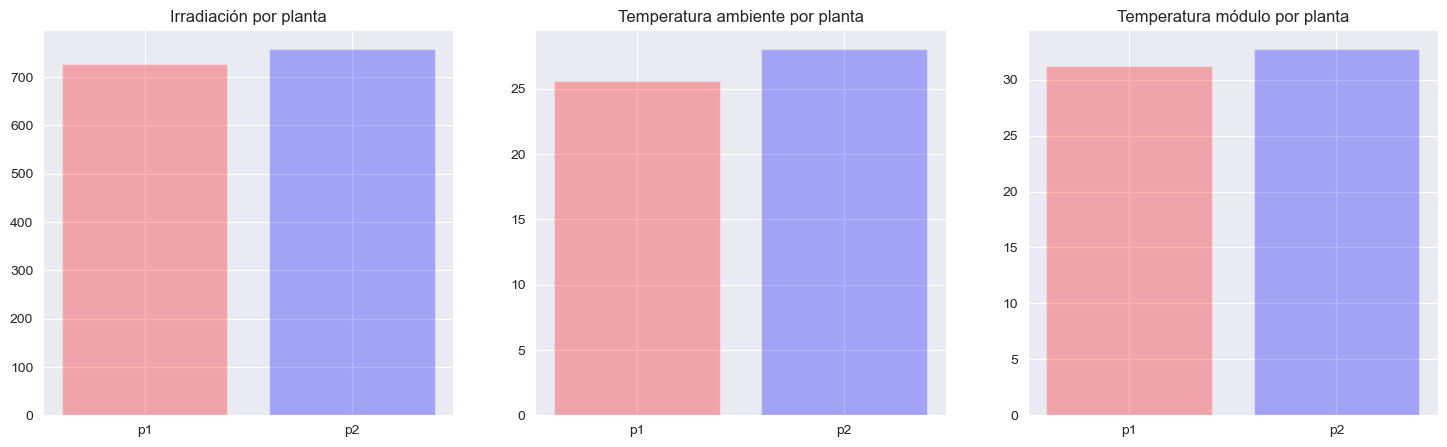

In [7]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,5))

ax[0].bar(temp.index, temp.irradiacion, color = ['red','blue'], alpha = 0.3)
ax[1].bar(temp.index, temp.t_ambiente, color = ['red','blue'], alpha = 0.3)
ax[2].bar(temp.index, temp.t_modulo, color = ['red','blue'], alpha = 0.3)
ax[0].set_title('Irradiación por planta')
ax[1].set_title('Temperatura ambiente por planta')
ax[2].set_title('Temperatura módulo por planta');

Conclusiones:

* En general la planta 2 recibe más energía solar que la 1
* Pero esta diferencia no puede implicar el problema de rendimiento que supuestamente existe

### ¿Cómo se relacionan esas tres variables?

In [8]:
temp = recepcion.loc[:,['planta','irradiacion','t_ambiente','t_modulo']]
temp

planta     irradiacion      t_ambiente        t_modulo
fecha                                                                     
2020-05-15 00:00:00     p1            0.00           25.18           22.86
2020-05-15 00:15:00     p1            0.00           25.08           22.76
2020-05-15 00:30:00     p1            0.00           24.94           22.59
2020-05-15 00:45:00     p1            0.00           24.85           22.36
2020-05-15 01:00:00     p1            0.00           24.62           22.17
...                    ...             ...             ...             ...
2020-06-17 22:45:00     p2            0.00           23.51           22.86
2020-06-17 23:00:00     p2            0.00           23.48           22.74
2020-06-17 23:15:00     p2            0.00           23.35           22.49
2020-06-17 23:30:00     p2            0.00           23.29           22.37
2020-06-17 23:45:00     p2            0.00           23.20           22.54

[6413 rows x 4 columns]

In [9]:
temp.select_dtypes(include='number').corr()

irradiacion      t_ambiente        t_modulo
irradiacion            1.00            0.65            0.95
t_ambiente             0.65            1.00            0.82
t_modulo               0.95            0.82            1.00

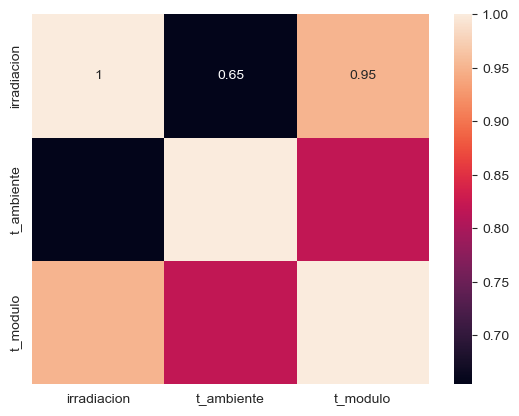

In [10]:
sns.heatmap(temp.select_dtypes(include='number').corr(), annot=True);

C:\Users\cris1\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cris1\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cris1\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


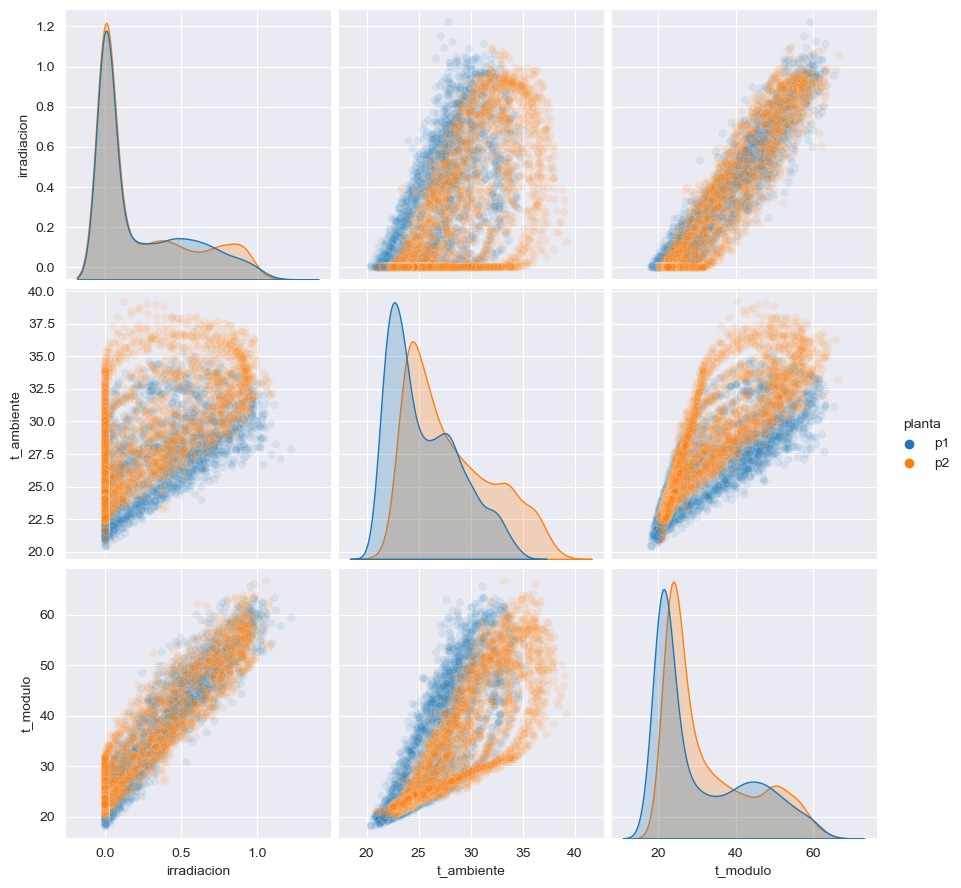

In [11]:
sns.pairplot(temp.reset_index(), hue = 'planta', height=3, plot_kws={'alpha': 0.1});

Conclusiones:

* La irradiación correlaciona mucho con la temperatura del módulo
* Pero no tanto con la temperatura ambiente
* Por tanto una primera forma de identificar módulos defectuosos o sucios es localizar los que produzcan poco cuando la irradiación es alta

### ¿Cómo se distribuye la irradiación y la temperatura a lo largo del día?

In [12]:
print(recepcion['hora'].shape)         # Debería ser (6413,)
print(recepcion['planta'].shape)       # Debería ser (6413,)
print(recepcion['irradiacion'].shape)  # Debería ser (6413,)

(6413, 2)
(6413,)
(6413,)


In [13]:
recepcion.isna().sum()

planta         0
mes            0
mes            0
dia            0
dia            0
hora           0
hora           0
minuto         0
minuto         0
sensor_id      0
irradiacion    0
t_ambiente     0
t_modulo       0
dtype: int64

In [17]:
temp = pd.crosstab(recepcion['hora'], recepcion['planta'],values=recepcion['irradiacion'], aggfunc='mean')

ValueError: Data must be 1-dimensional, got ndarray of shape (6413, 2) instead

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f");

In [69]:
temp = pd.crosstab(recepcion.hora,recepcion.planta,values = recepcion.t_ambiente,aggfunc='mean')
temp

planta              p1              p2
hora                                  
0                22.80           25.20
1                22.63           24.82
2                22.46           24.48
3                22.32           24.27
4                22.17           24.07
5                22.06           23.91
6                22.20           24.19
7                23.34           25.48
8                24.92           27.05
9                26.48           28.61
10               27.65           30.17
11               28.80           31.43
12               29.62           32.55
13               30.10           33.01
14               30.29           33.16
15               29.99           32.81
16               29.38           32.44
17               28.29           31.59
18               26.66           30.00
19               25.36           28.61
20               24.50           27.63
21               23.87           26.75
22               23.26           26.06
23               22.92           25.46

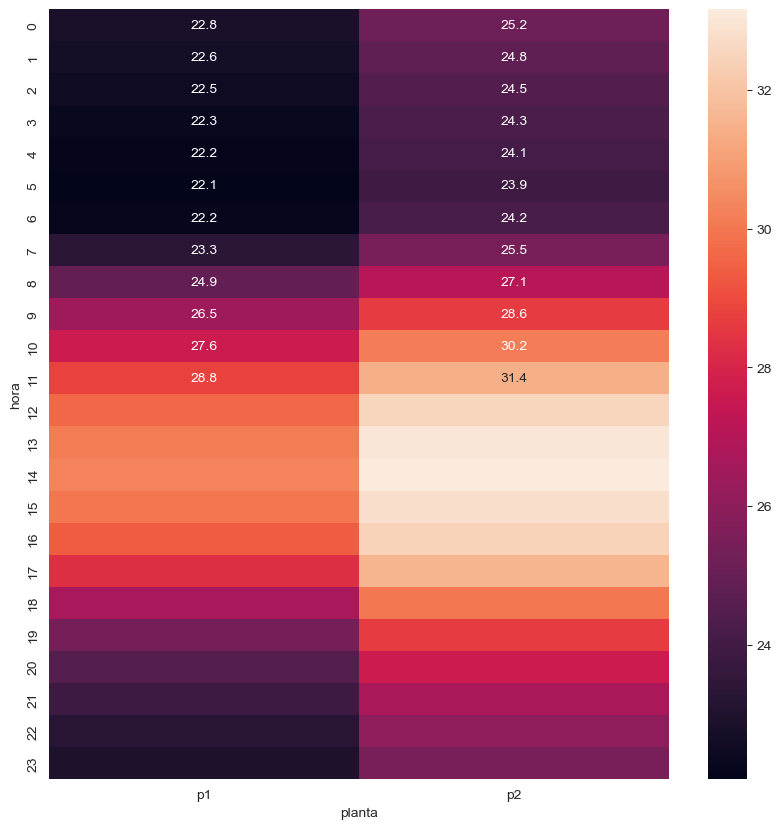

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".1f");

Conclusiones:

* Ambas plantas tienen patrones similares. Podríamos pensar que están en zonas geográficas no muy alejadas
* Existe irradiación (y por tanto a priori las plantas deberían producir) entre las 7 y las 17
* La irradiación máxima se produce entre las 11 y las 12
* La temperatura ambiente máxima se produce entre las 14 y las 16

### ¿Ambas plantas son igual de capaces de generar DC a partir de la irradiación?

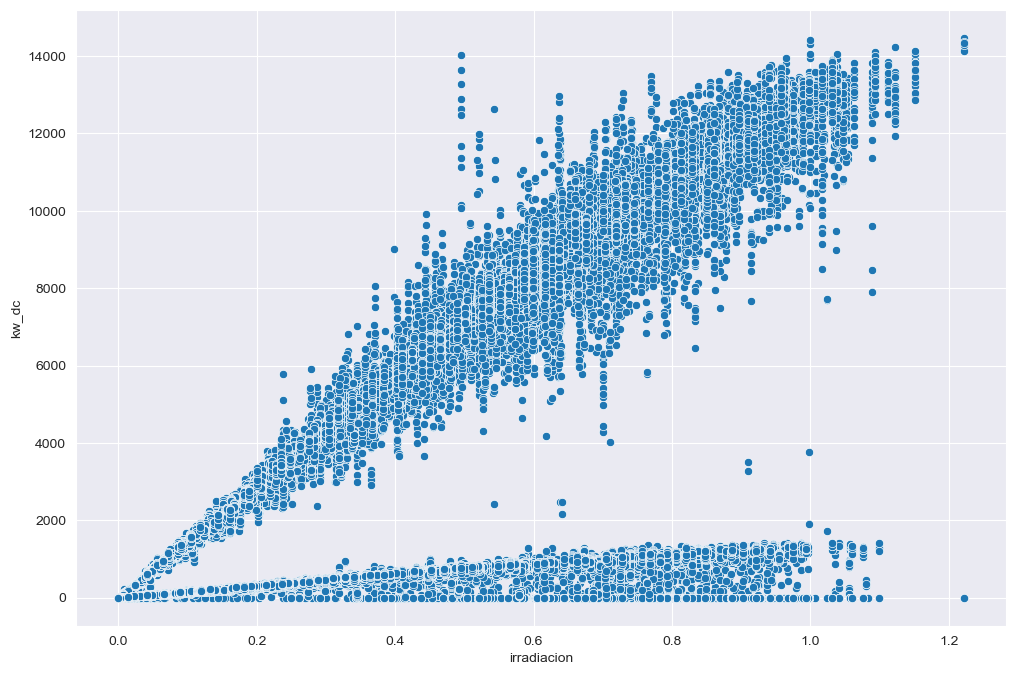

In [13]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df.irradiacion, y = df.kw_dc);

Existen 2 patrones claramente diferentes. ¿Serán las plantas?

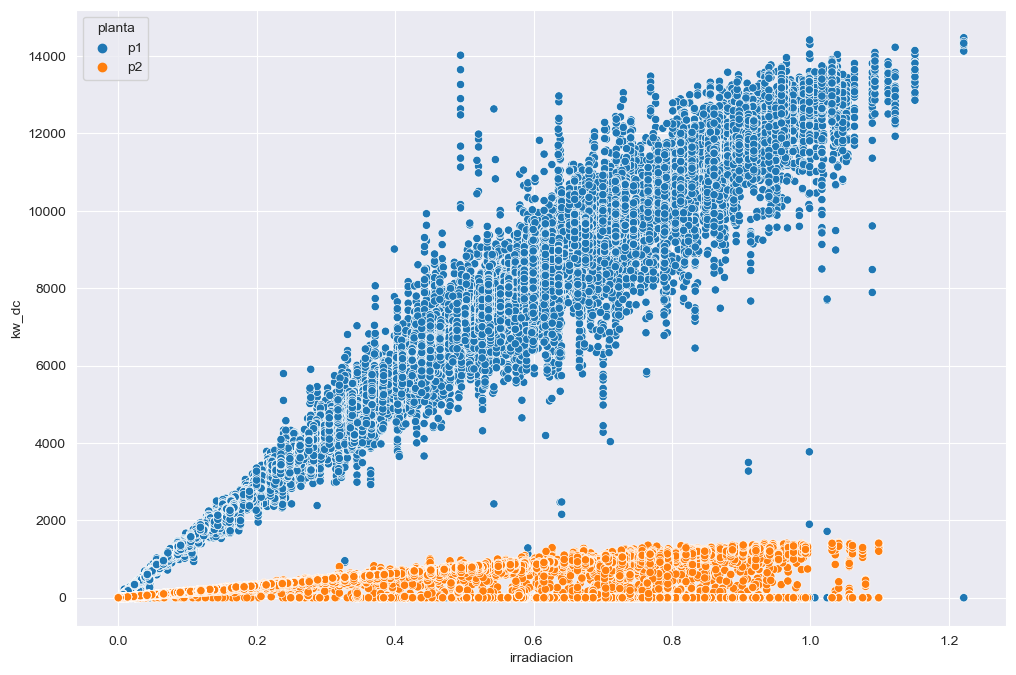

In [72]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df.irradiacion, y = df.kw_dc, hue = 'planta');

La planta número 2 produce muchos menos kw ante los mismos niveles de irradiación.

Pero antes habíamos visto que la relación entre dc y ac en la planta 1 era rara.

Y también que los datos de dc y ac no cuadraban con los de kw_dia.

Hay algo raro en los datos.

Vamos a ver la relación entre la irradiación y kw_dia a ver si nos da luz.

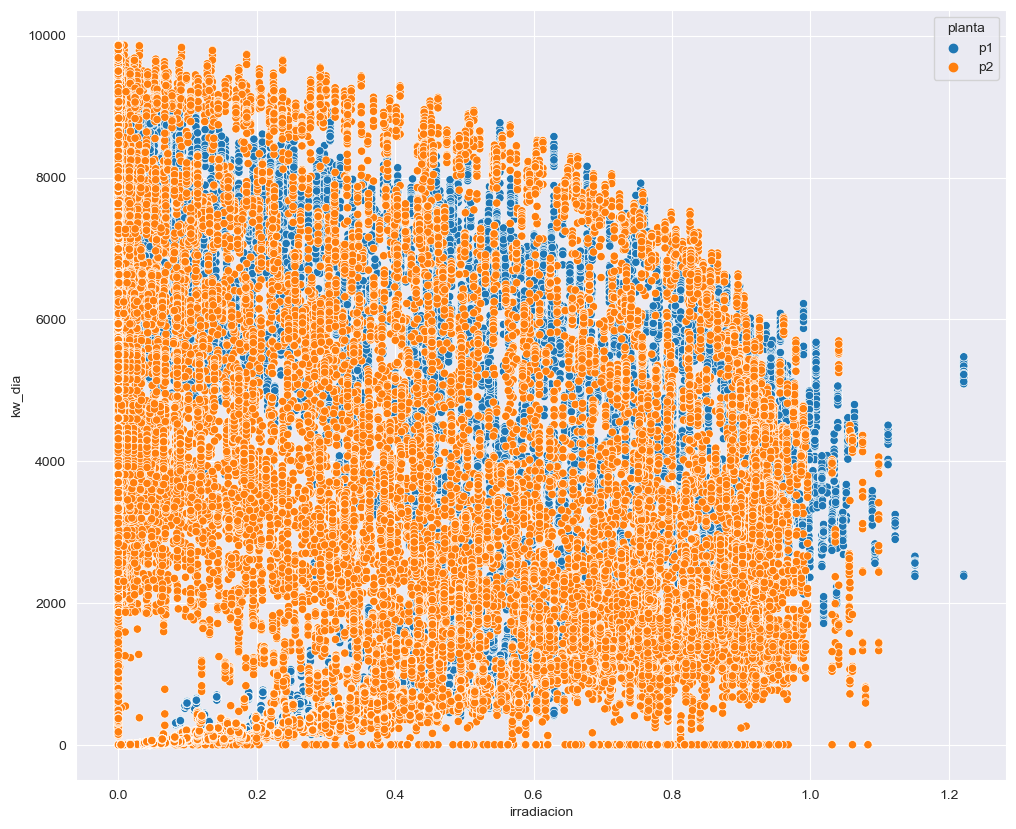

In [73]:
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = df.irradiacion, y = df.kw_dia, hue = 'planta');

Es muy extraño. Parece que la relación es que a más irradiación menos kw generados. Lo cual no tiene sentido.

Incluso parece que los máximos de kw se producen en horas de irradiación cero.

¿Te imaginas qué puede estar pasando?

CUIDADO: la variable kw_dia es un ACUMULADO. Eso significa que debería alcanzar su máximo cuando llega la última hora del día, por ej las 23:45, donde obviamente la irradiación es cero.

Y no tener datos hsta pasadas las 7 que es cuando vemos que hay irradiación.

Vamos a comprobarlo.

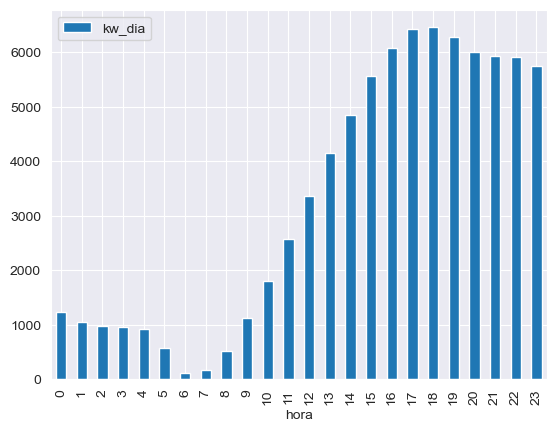

In [74]:
df.groupby('hora')[['kw_dia']].mean().plot.bar();

De nuevo algo no cuadra. Hay generación entre las 00 y las 06.

Y además a partir de las 18 comienza a decaer, lo cual no debería pasar si es un acumulado.

Conclusión:

No nos fiamos de estas variables acumuladas como kw_dia y kw_total.

Pero la verdad es que tampoco nos fiamos mucho de las otras.

En una situación real yo pararía el proyecto hasta ser capaz de ver qué pasa con los datos.

Pero para poder continuar vamos a asumir que los datos de dc y ac son correctos.

Y bajo esa asunción obtendremos nuestras conclusiones.

**INSIGHT #1**

La planta 2 genera niveles mucho más bajos de DC incluso a niveles similares de irradiación

### ¿La generación es constante a lo largo de los días?

Podemos usar el df_dia para graficar la visión global de generación de DC durante el período de análisis.

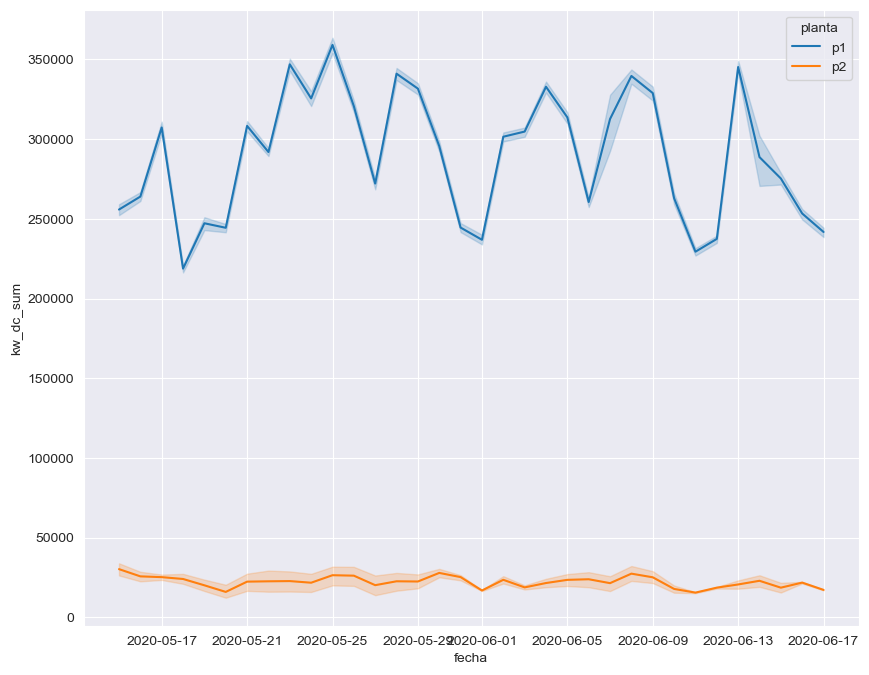

In [75]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_dia.reset_index(), x = df_dia.reset_index().fecha, y = 'kw_dc_sum', hue = 'planta');

Vemos que la planta 1 tiene mucha más variabilidad mientras que la planta 2 es mucho más constante.

Pero sobre todo nos extraña los bajos niveles de generacion de DC en de la planta 2 en comparación con la 1.

Vamos a examinar la generación de cada día a ver si vemos algo raro.

Generamos una variable date para poder agregar por ella.

In [15]:
df['date'] = df.index.date
df

planta  mes  mes  dia  dia  hora  hora  minuto  minuto  \
fecha                                                                        
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
2020-05-15 00:00:00     p1    5    5   15   15     0     0       0       0   
...                    ...  ...  ...  ...  ...   ...   ...     ...     ...   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   
2020-06-17 23:45:00     p2    6    6   17   17    23    23      45      45   

                           sensor_id     irradiacion      t_ambiente  \
fecha                                                                  
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
2020-05-15 00:00:00  HmiyD2TTLFNqkNe            0.00           25.18   
...                              ...             ...             ...   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   
2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            0.00           23.20   

                           t_modulo      inverter_id           kw_dc  \
fecha                                                                  
2020-05-15 00:00:00           22.86  1BY6WEcLGh8j5v7            0.00   
2020-05-15 00:00:00           22.86  1IF53ai7Xc0U56Y            0.00   
2020-05-15 00:00:00           22.86  3PZuoBAID5Wc2HD            0.00   
2020-05-15 00:00:00           22.86  7JYdWkrLSPkdwr4            0.00   
2020-05-15 00:00:00           22.86  McdE0feGgRqW7Ca            0.00   
...                             ...              ...             ...   
2020-06-17 23:45:00           22.54  q49J1IKaHRwDQnt            0.00   
2020-06-17 23:45:00           22.54  rrq4fwE8jgrTyWY            0.00   
2020-06-17 23:45:00           22.54  vOuJvMaM2sgwLmb            0.00   
2020-06-17 23:45:00           22.54  xMbIugepa2P7lBB            0.00   
2020-06-17 23:45:00           22.54  xoJJ8DcxJEcupym            0.00   

                              kw_ac      eficiencia          kw_dia  \
fecha                                                                 
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
2020-05-15 00:00:00            0.00            0.00            0.00   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00            0.00         4157.00   
2020-06-17 23:45:00            0.00            0.00         3931.00   
2020-06-17 23:45:00            0.00            0.00         4322.00   
2020-06-17 23:45:00            0.00            0.00         4218.00   
2020-06-17 23:45:00            0.00            0.00         4316.00   

                           kw_total        date  
fecha                                            
2020-05-15 00:00:00      6259559.00  2020-05-15  
2020-05-15 00:00:00      6183645.00  2020-05-15  
2020-05

Creamos un dataframe temporal para analizar la generación de DC horaria en cada día en la planta 1.

In [16]:
dc_constante_p1 = df[df.planta == 'p1'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p1

ValueError: Grouper for 'hora' not 1-dimensional

Vamos a pasar date a columnas, para poder respresentar cada columna (que son los dates) como una variable y por tanto como un gráfico independiente.

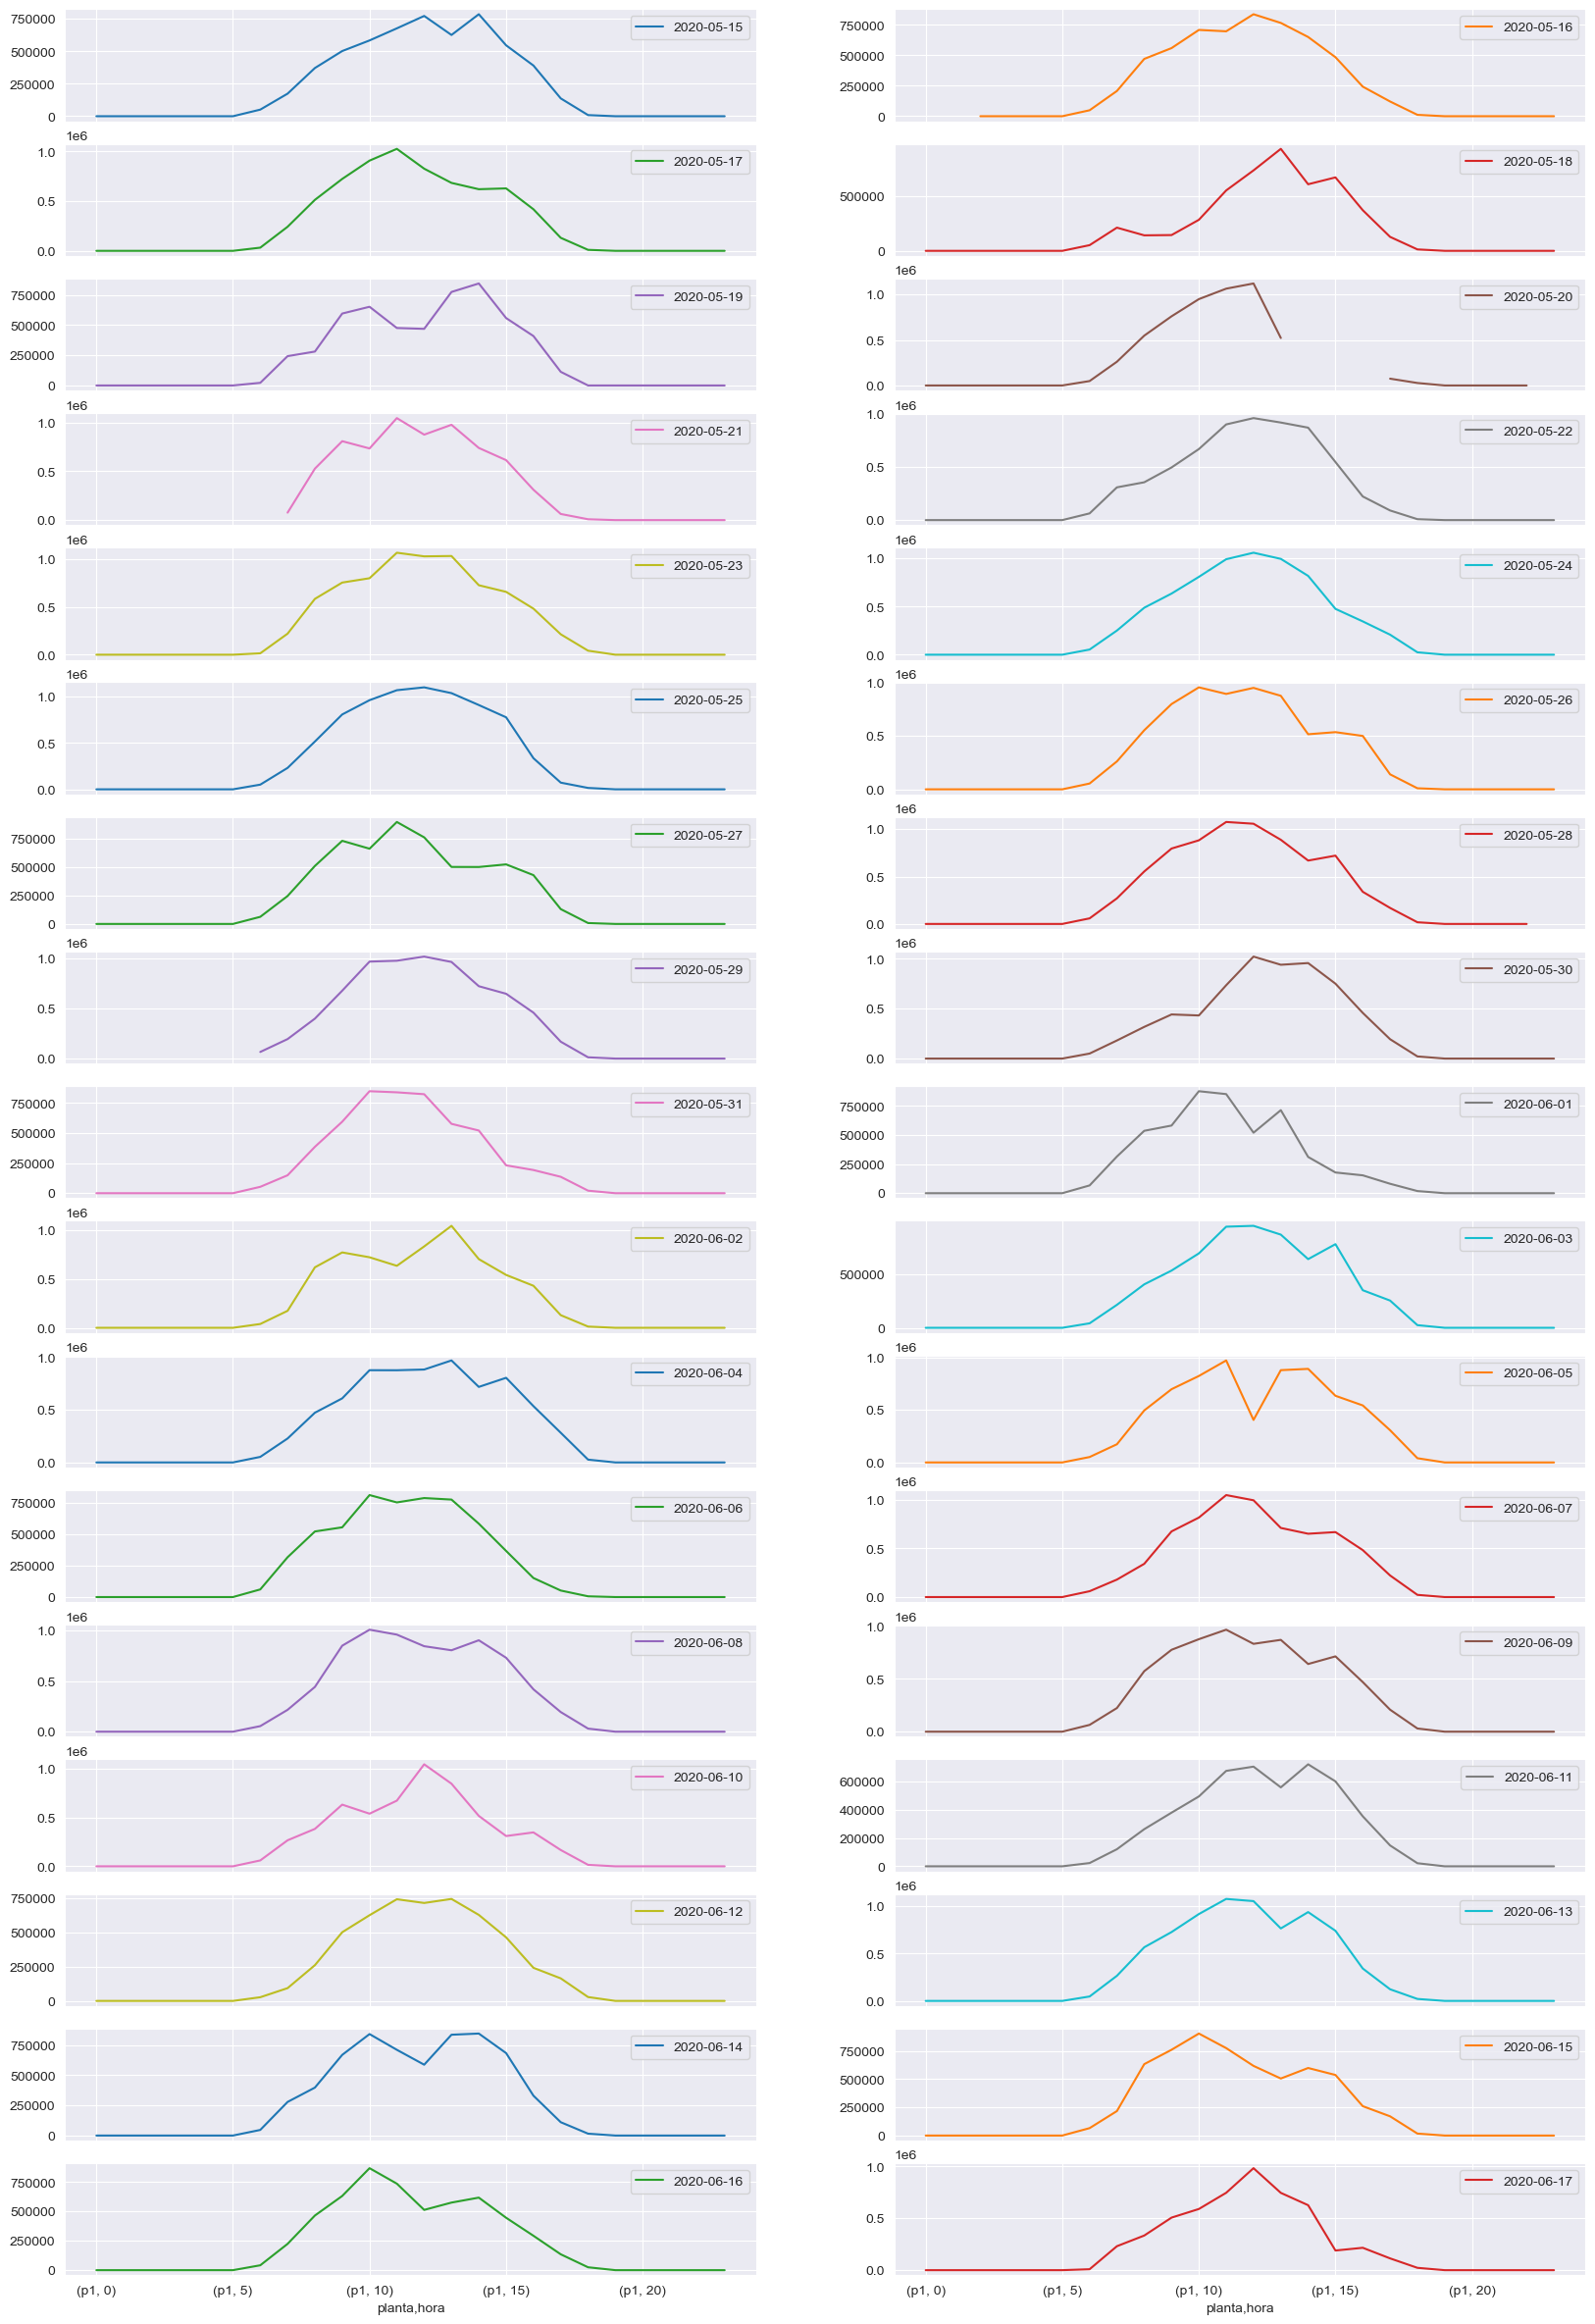

In [78]:
dc_constante_p1.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

Conclusiones:

* En la planta 1 sí se mantienen unos patrones similares durante todos los días
* A excepción de un parón el día 20 de Mayo y una caída extraña el 05 de Junio
* Pero ninguna parece ser estructural
* Por tanto aunque cada día pudiera tener diferentes totales de producción los patrones intradía son similares y parecen correctos

Repetimos el análisis en la planta 2

In [79]:
dc_constante_p2 = df[df.planta == 'p2'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p2

planta  date        hora
p2      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 816, dtype: float64

Vamos a pasar date a columnas, para poder respresentar cada columna (que son los dates) como una variable y por tanto como un gráfico independiente.

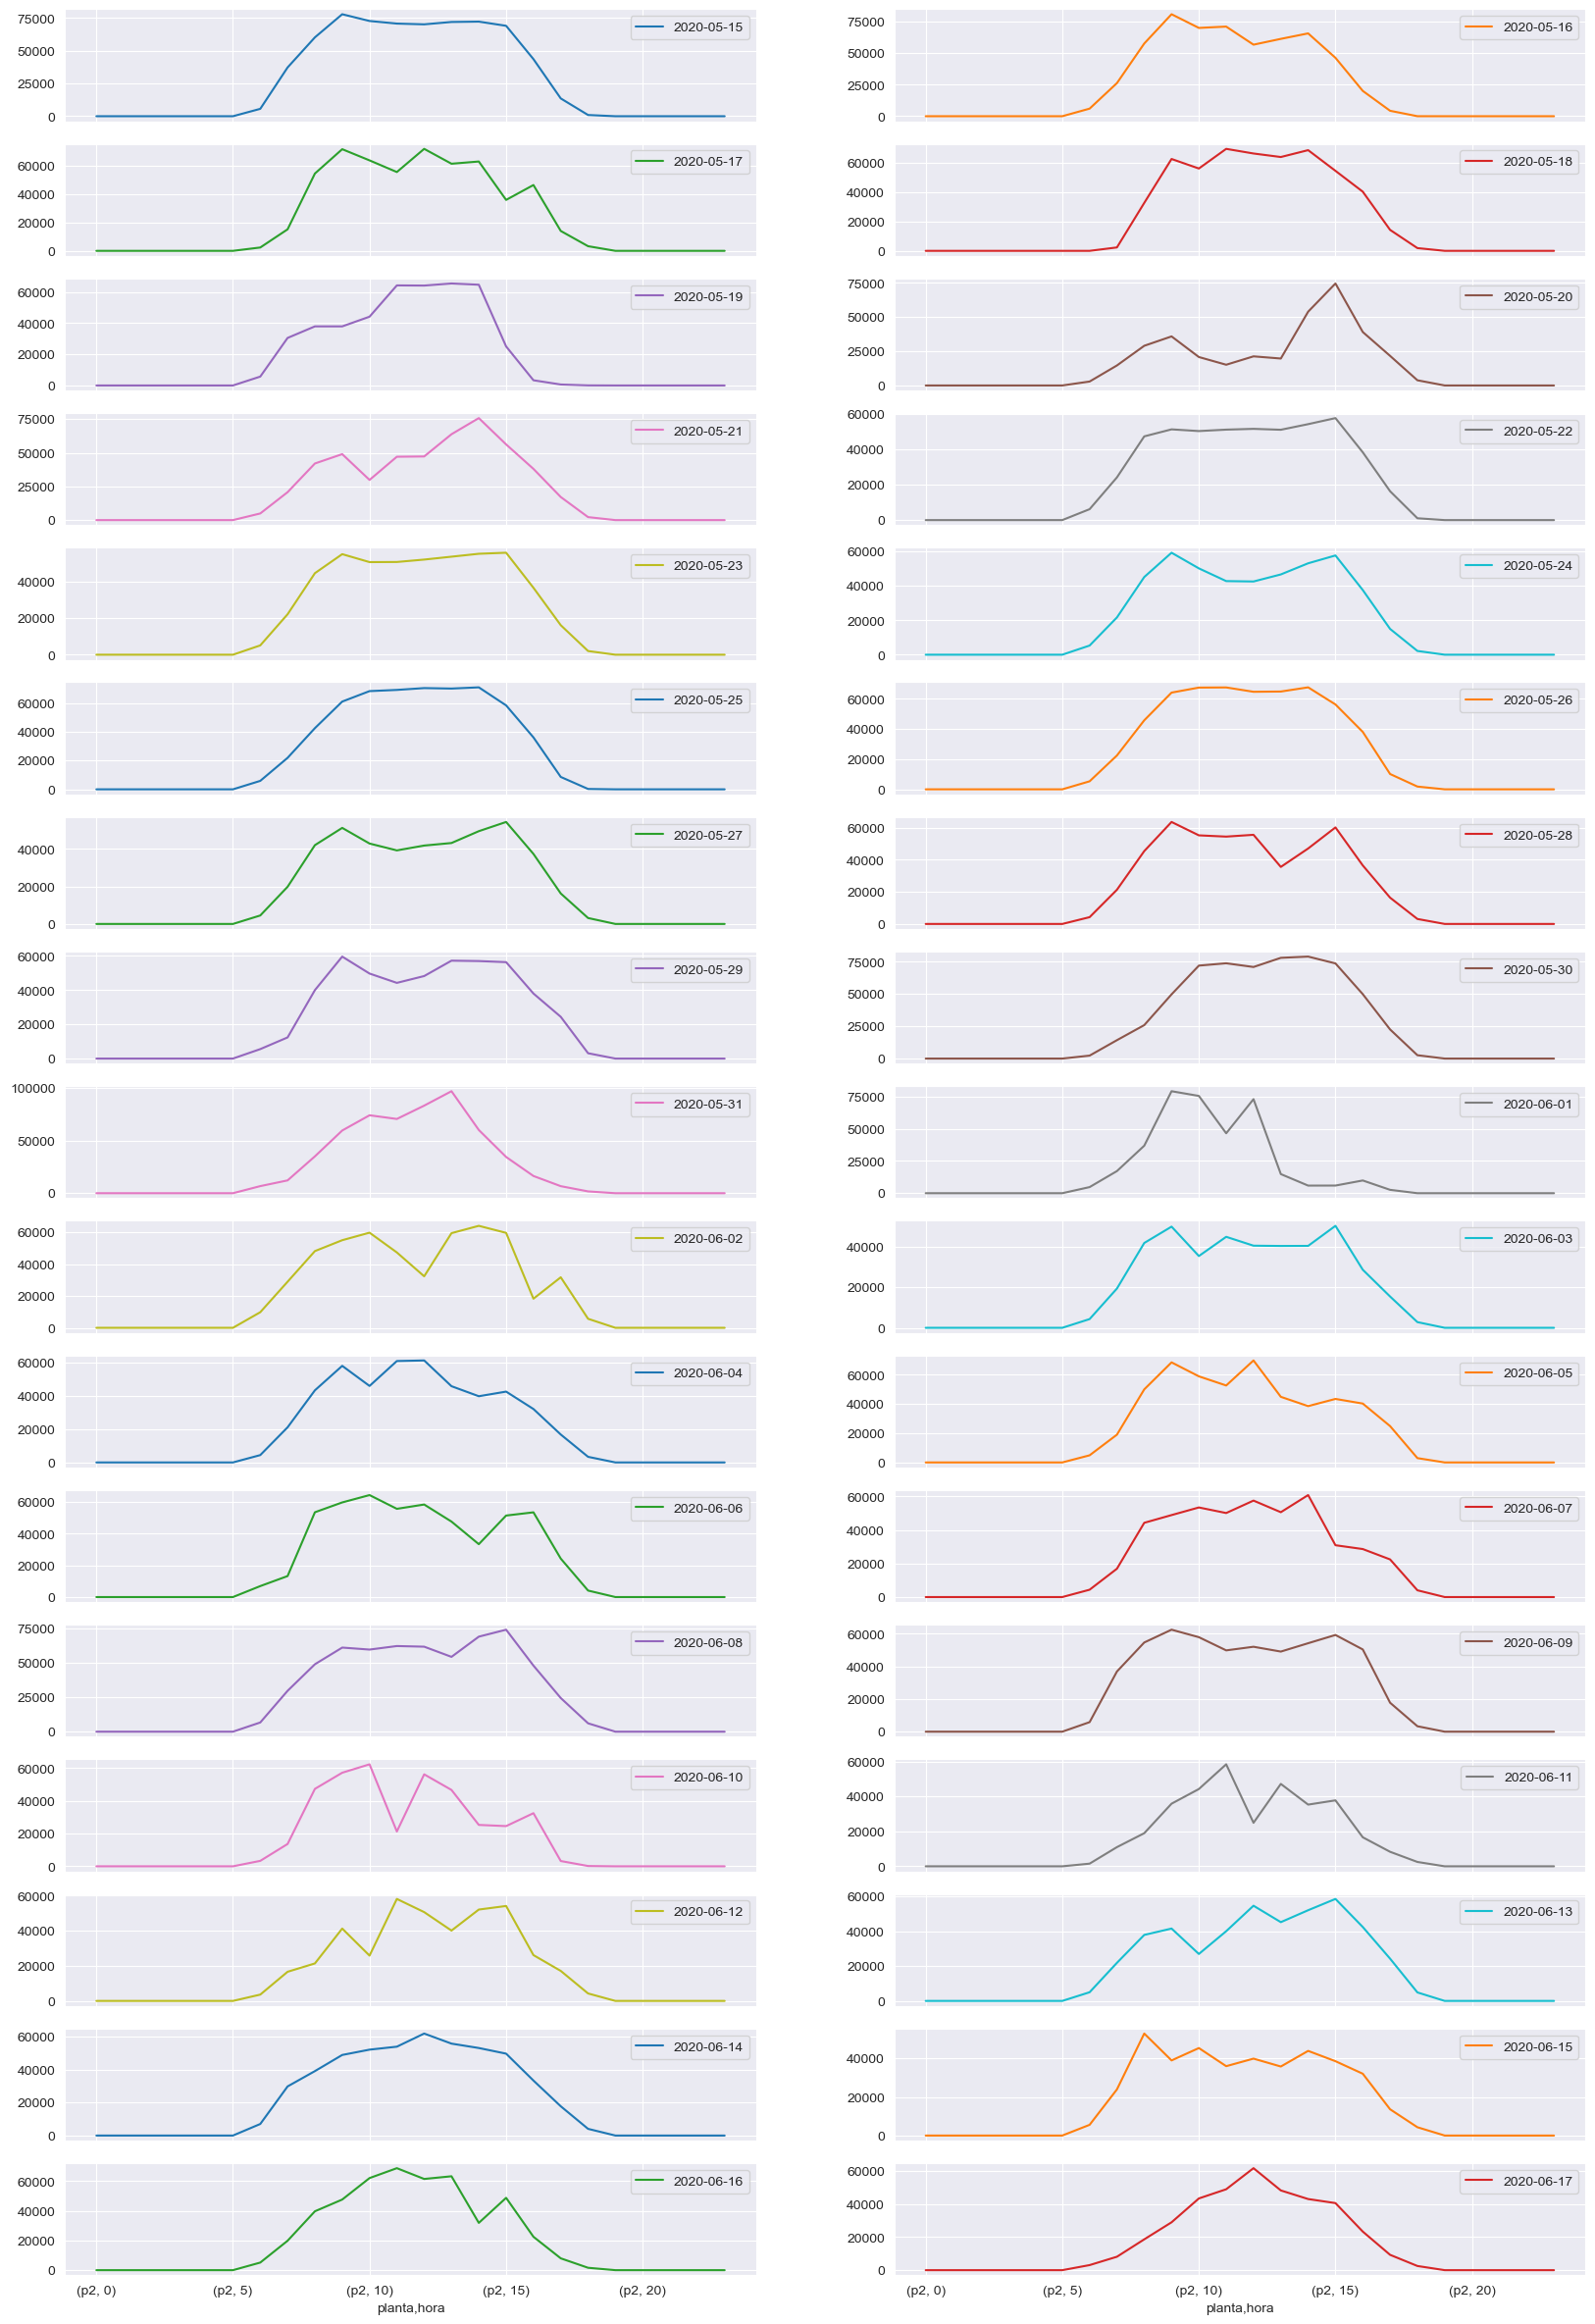

In [80]:
dc_constante_p2.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

Conclusiones:

* De nuevo el día 20 de Mayo aparece con un comportamiento raro
* Los niveles de producción son constantes durante los días, pero siempre unas 10 veces por debajo de los nivels de la planta 1

**INSIGHT #2:** Los niveles bajos de la planta 2 son constantes y presentan unas curvas diarias que parecen normales.

### ¿La conversión de DC a AC se genera correctamente?

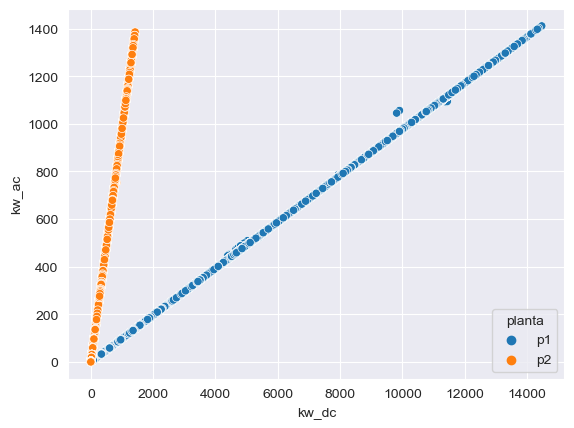

In [81]:
sns.scatterplot(data = df, x = df.kw_dc, y = df.kw_ac, hue = df.planta);

De nuevo los patrones son clarísimos: la planta 2 transforma la corriente de forma mucho más eficiente.

Vamos a ampliar analizando la variable eficiencia que habíamos creado.

In [82]:
temp = df.groupby(['planta','hora'],as_index = False).eficiencia.mean()
temp

planta  hora      eficiencia
0      p1     0            0.00
1      p1     1            0.00
2      p1     2            0.00
3      p1     3            0.00
4      p1     4            0.00
5      p1     5            0.00
6      p1     6            9.20
7      p1     7            9.80
8      p1     8            9.81
9      p1     9            9.78
10     p1    10            9.77
11     p1    11            9.75
12     p1    12            9.71
13     p1    13            9.68
14     p1    14            9.76
15     p1    15            9.79
16     p1    16            9.81
17     p1    17            9.76
18     p1    18            6.53
19     p1    19            0.00
20     p1    20            0.00
21     p1    21            0.00
22     p1    22            0.00
23     p1    23            0.00
24     p2     0            0.00
25     p2     1            0.00
26     p2     2            0.00
27     p2     3            0.00
28     p2     4            0.00
29     p2     5            0.58
30     p2     6           92.93
31     p2     7           97.39
32     p2     8           97.42
33     p2     9           91.70
34     p2    10           76.20
35     p2    11           68.35
36     p2    12           68.16
37     p2    13           73.04
38     p2    14           83.43
39     p2    15           95.69
40     p2    16           95.85
41     p2    17           95.56
42     p2    18           73.52
43     p2    19            0.00
44     p2    20            0.00
45     p2    21            0.00
46     p2    22            0.00
47     p2    23            0.00

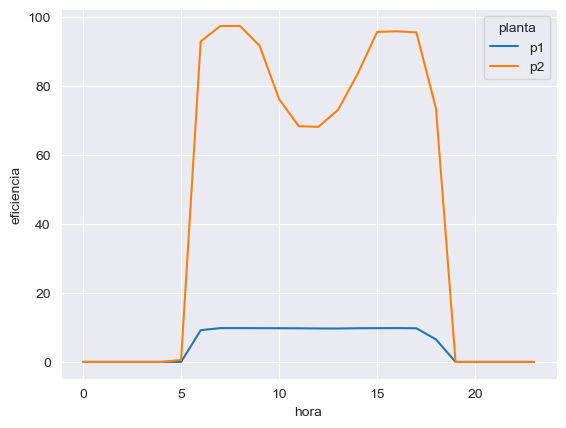

In [83]:
sns.lineplot(data = temp, x = 'hora', y = 'eficiencia', hue = 'planta');

**INSIGHT #3**

La planta 1 tiene una capacidad de transformar DC a AC bajísima, lo cual sugiere problemas con los inverters

Otras conclusiones:

* Entrar en el detalle de los inverters de la planta 1, a ver si son todos o hay algunos que sesgan la media
* Revisar por qué la planta 2 pierde eficiencia durante las horas de más irradiación

Vamos a empezar por la segunda, comparando la producción de DC con la de AC en la planta 2.

In [84]:
temp = df[['planta','hora','kw_dc','kw_ac']].melt(id_vars= ['planta','hora'])
temp

planta  hora variable           value
0          p1     0    kw_dc            0.00
1          p1     0    kw_dc            0.00
2          p1     0    kw_dc            0.00
3          p1     0    kw_dc            0.00
4          p1     0    kw_dc            0.00
...       ...   ...      ...             ...
272939     p2    23    kw_ac            0.00
272940     p2    23    kw_ac            0.00
272941     p2    23    kw_ac            0.00
272942     p2    23    kw_ac            0.00
272943     p2    23    kw_ac            0.00

[272944 rows x 4 columns]

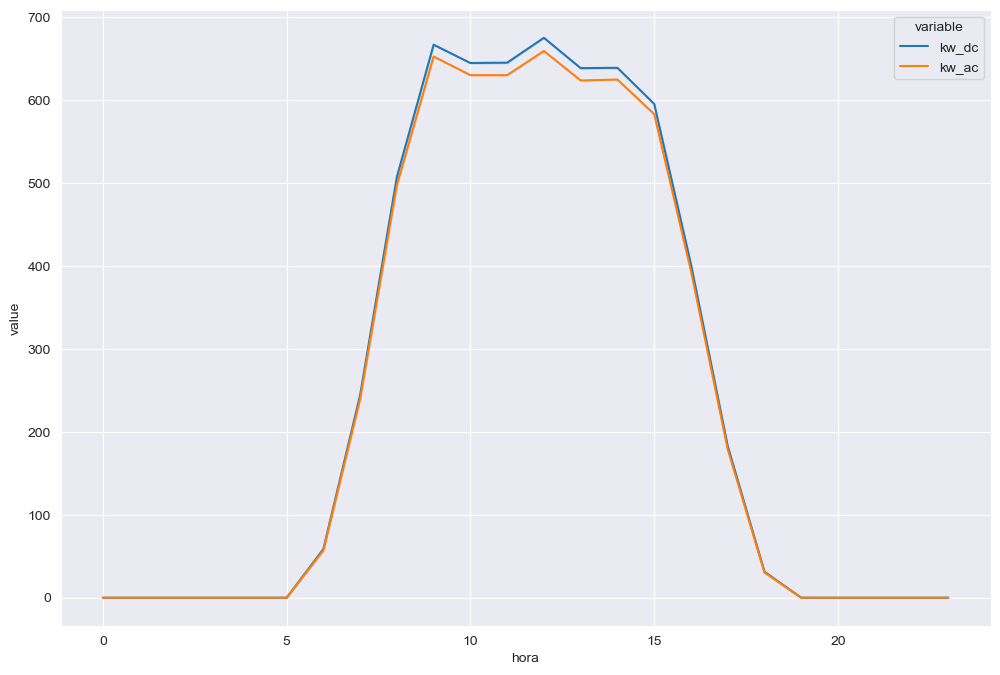

In [85]:
plt.figure(figsize = (12,8))
sns.lineplot(data = temp[temp.planta == 'p2'], x = 'hora', y = 'value', hue = 'variable', errorbar=('ci', False));

Vemos que efectivamente en las horas centrales hay pérdida de eficiencia. Pero ni de lejos el nivel de pérdida que habíamos visto en el análisis anterior.

Vamos a analizar la distribución de la eficiencia en esas horas.

In [86]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p2']

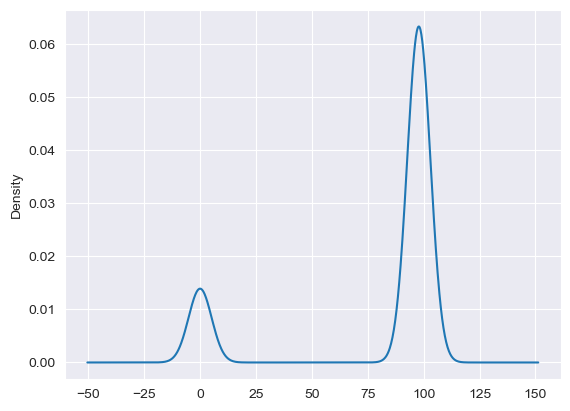

In [87]:
temp.eficiencia.plot.density();

Hay un conjunto de datos con eficiencia cero, y es lo que genera el problema. ¿Pero cual es la causa de esa eficiencia cero?

Vamos a seleccionar esos casos y revisarlos.

In [88]:
temp[temp.kw_dc == 0]

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 10:00:00     p2    5   15    10       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 10:00:00            0.83           31.89           46.13   
...                             ...             ...             ...   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 09:45:00  81aHJ1q11NBPMrL            0.00            0.00   
2020-05-15 09:45:00  Et9kgGMDl729KT4            0.00            0.00   
2020-05-15 09:45:00  Quc1TzYxW2pYoWX            0.00            0.00   
2020-05-15 09:45:00  xoJJ8DcxJEcupym            0.00            0.00   
2020-05-15 10:00:00  81aHJ1q11NBPMrL            0.00            0.00   
...                              ...             ...             ...   
2020-06-16 14:30:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-16 14:30:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-16 14:30:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-16 14:30:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-16 14:30:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 09:45:00            0.00         1645.00   1215280381.00   
2020-05-15 09:45:00            0.00         1541.00      1705791.00   
2020-05-15 09:45:00            0.00         1324.00    329510409.00   
2020-05-15 09:45:00            0.00         1735.00    209145328.00   
2020-05-15 10:00:00            0.00         1645.00   1215280381.00   
...                             ...             ...             ...   
2020-06-16 14:30:00            0.00            0.00        34379.33   
2020-06-16 14:30:00            0.00            0.00      8075096.33   
2020-06-16 14:30:00            0.00            0.00       173022.79   
2020-06-16 14:30:00            0.00            0.00      7126074.93   
2020-06-16 14:30:00            0.00            0.00     13955359.33   

                           date  
fecha                            
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 10:00:00  2020-05-15  
...                         ...  
2020-06-16 14:30:00  2020-06-16  
2020-

Parece que no es problema del inverter, si no de que en esos momentos no se ha generado DC.

Vamos a poner la condición de que DC > 0 y ver ahí cual es la eficiencia.

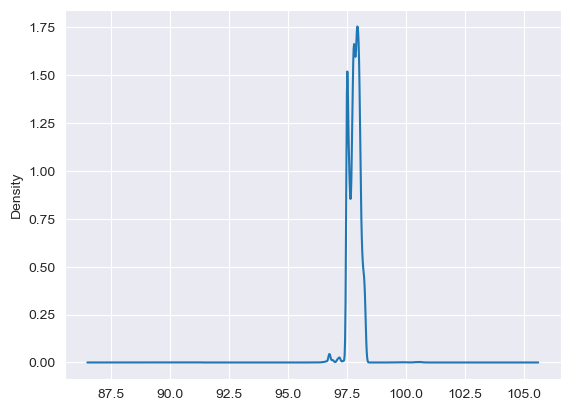

In [89]:
temp[temp.kw_dc > 0].eficiencia.plot.density();

Efectivamente cuando hay DC la eficiencia es superior al 96%.

La pregunta entonces es ¿por qué no hay DC? ¿Hay algún patrón?

Vamos a crear un indicador de DC = 0 para poder analizarlo.

In [90]:
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

Empezamos por las variables numéricas.

In [91]:
temp.groupby('kw_dc_cero')[['irradiacion','t_ambiente','t_modulo']].mean()

irradiacion      t_ambiente        t_modulo
kw_dc_cero                                                
0                     0.59           30.48           44.32
1                     0.80           32.48           52.03

En la temperatura ambiente no hay mucha diferencia, pero en la del módulo y en la irradiación sí.

¿Podría ser que si se calienta demasiado el módulo deje de generar DC?

Vamos a verlo comparando la temperatura del módulo con la generación de DC.

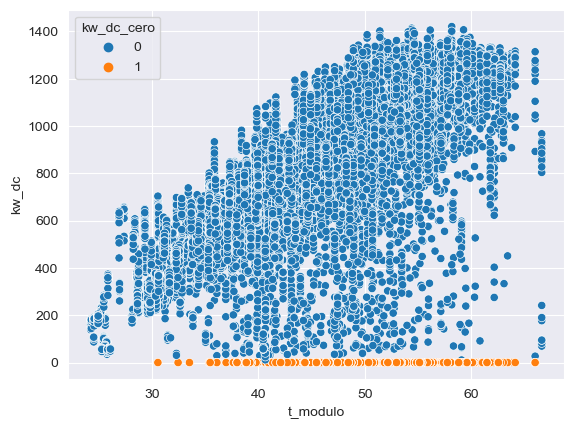

In [92]:
sns.scatterplot(data = temp, x = 't_modulo', y = 'kw_dc',hue = 'kw_dc_cero');

La hipótesis anterior no se confirma, ya que hay muchos casos de temperaturas altas donde se genera DC, y también de kw_dc igual a cero en casi todos los rangos de temperaturas.

Vamos a analizar ahora las categóricas, empezando por el inverter.

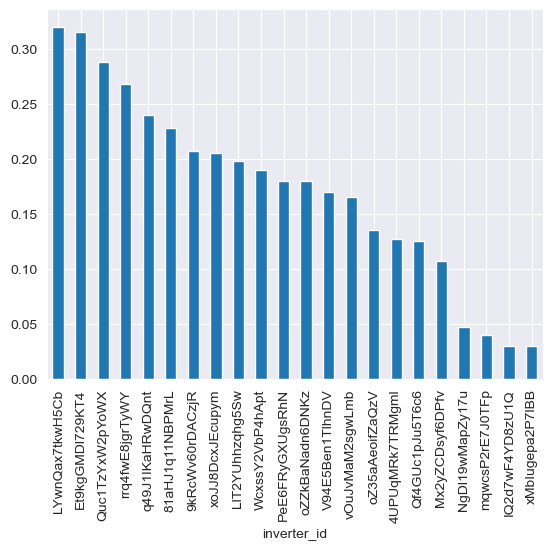

In [93]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar();

Existe gran diferencia en el porcentaje de producción cero de DC por inverter.

Desde algunos que tienen menos del 5% hasta algunos que superan el 30%.

**INSIGHT #4:**: En la planta 2 existen varios inverters a los que no está llegando suficiente producción de DC, y por tanto cuyos módulos necesitan revisión.

Vamos a analizar los inverters desde el punto de vista de la eficiencia media para ver si hay "buenos y malos".

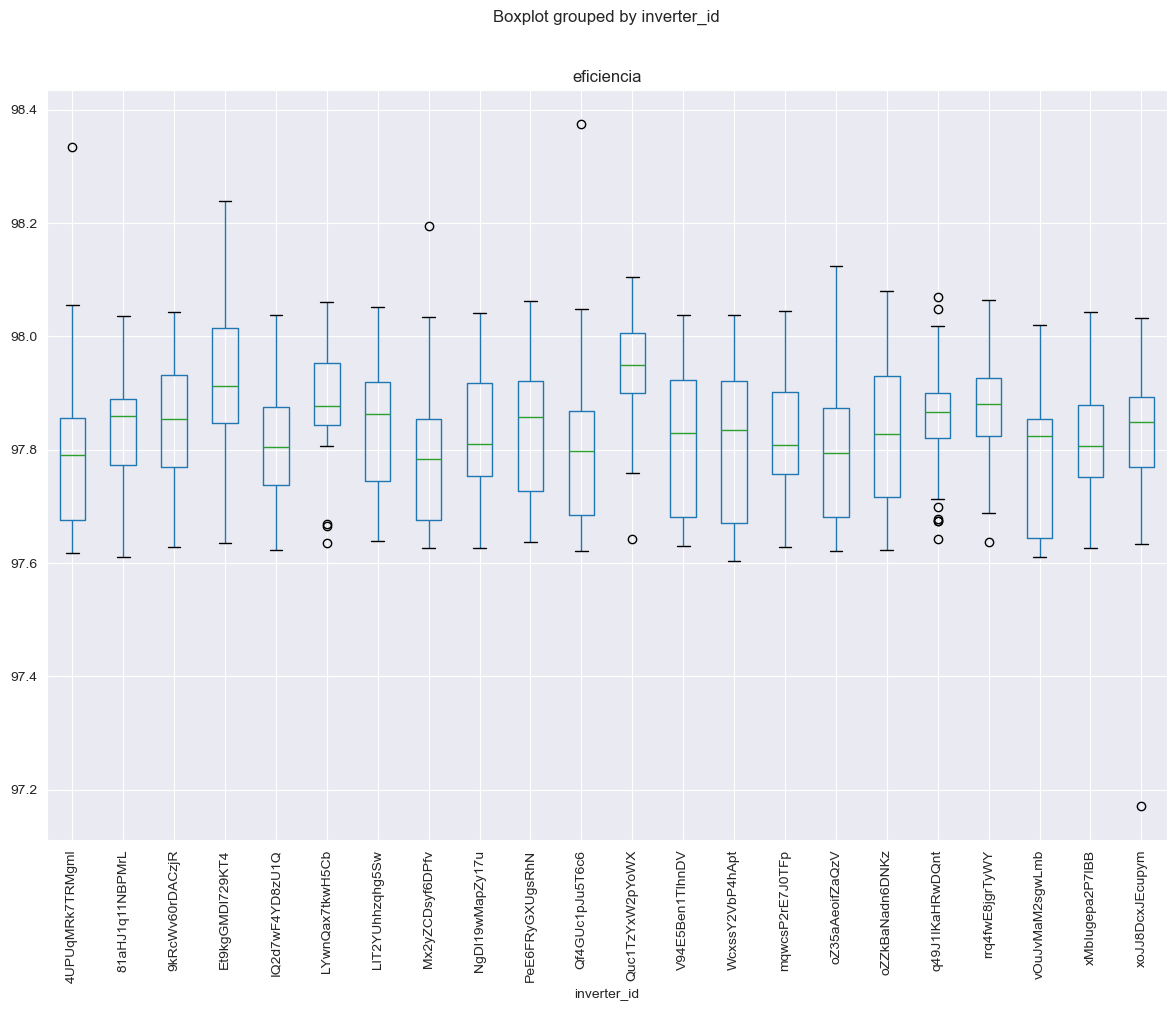

In [94]:
temp[temp.kw_dc > 0].groupby(['inverter_id','date'],as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

**INSIGHT #5:**: Una vez descontando el problema de la no generación de DC, los inverters de la planta 2 sí funcionan bien y hacen bien el trabajo de transformación a AC.

Para terminar de analizar la eficiencia de los inverters podemos ver su rendimiento en cada  uno de los días para ver si han posido existir problemas puntuales

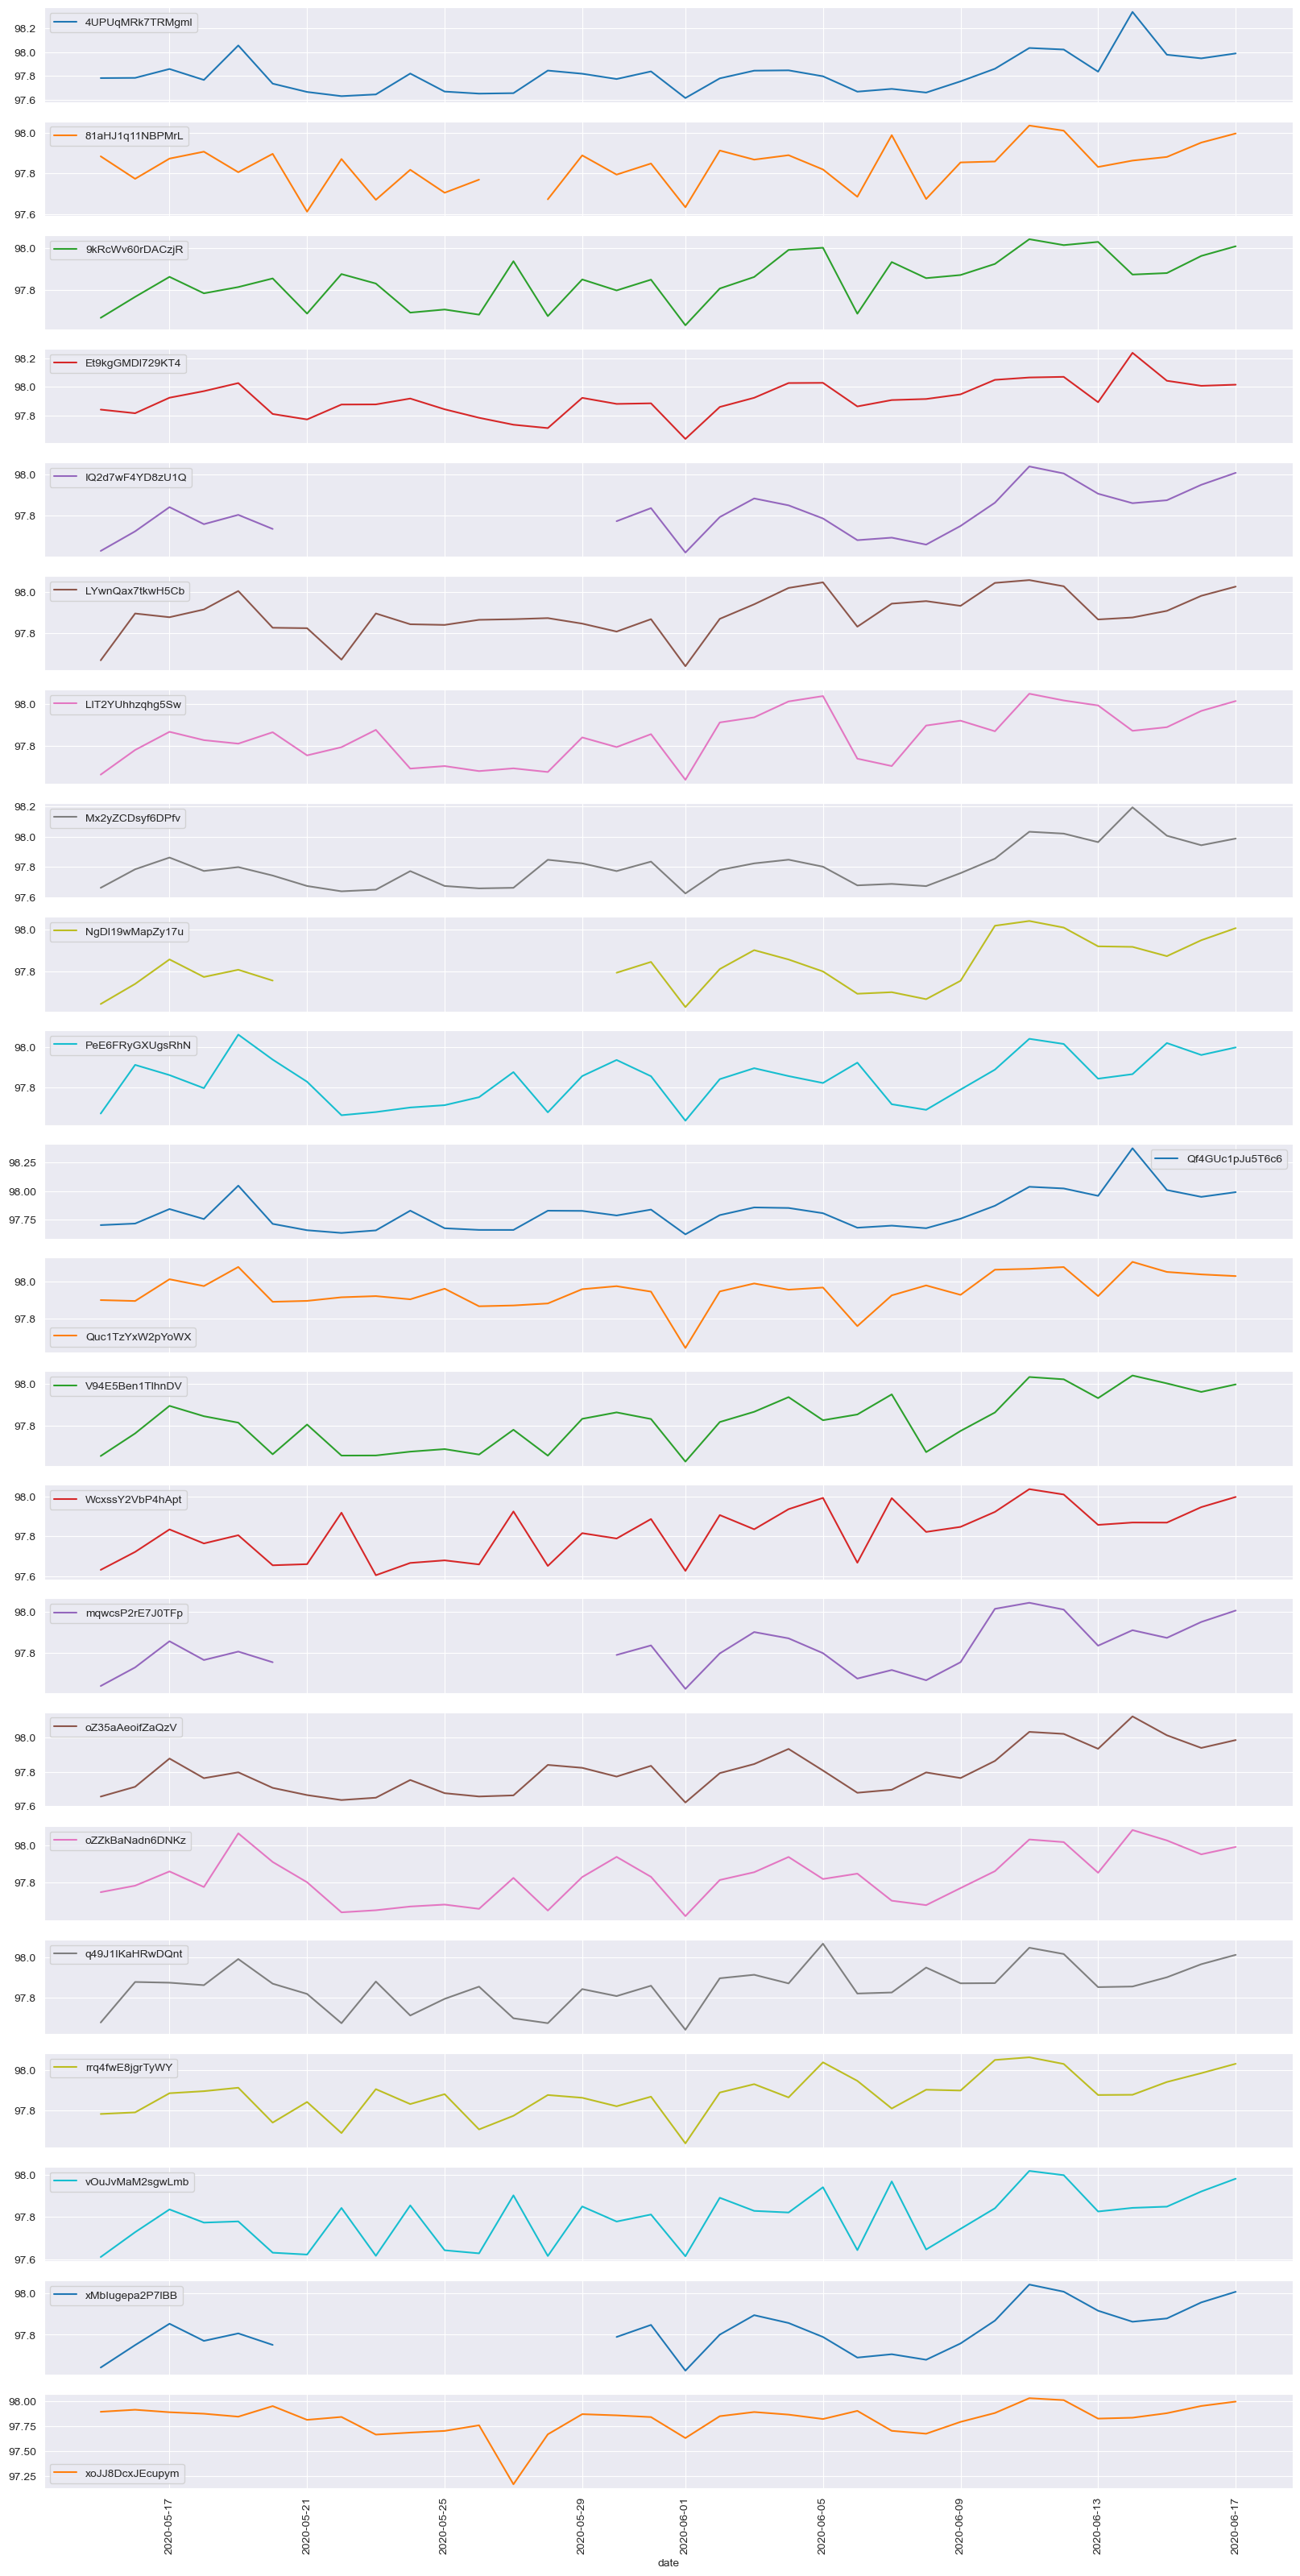

In [95]:
temp[temp.kw_dc > 0].groupby(['inverter_id','date']).eficiencia.mean().unstack(level = 0).plot(subplots = True, sharex=True, figsize=(20,40))
plt.xticks(rotation = 90);

Para tener un término de comparación vamos a repetir los análisis con la planta 1.

In [96]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p1']
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  1BY6WEcLGh8j5v7         3246.00          318.67   
2020-05-15 08:00:00  1IF53ai7Xc0U56Y         2805.62          275.46   
2020-05-15 08:00:00  3PZuoBAID5Wc2HD         2736.12          268.62   
2020-05-15 08:00:00  7JYdWkrLSPkdwr4         2741.50          269.15   
2020-05-15 08:00:00  McdE0feGgRqW7Ca         3208.88          315.05   
...                              ...             ...             ...   
2020-06-17 15:00:00  uHbuxQJl8lW7ozc         4719.62          462.89   
2020-06-17 15:00:00  wCURE6d3bPkepu2         5077.75          497.80   
2020-06-17 15:00:00  z9Y9gH1T5YWrNuG         5113.00          501.29   
2020-06-17 15:00:00  zBIq5rxdHJRwDNY         4675.38          458.61   
2020-06-17 15:00:00  zVJPv84UY57bAof         4853.75          475.96   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00            9.82          263.57      6259822.57   
2020-05-15 08:00:00            9.82          292.50      6183937.50   
2020-05-15 08:00:00            9.82          287.75      6988046.75   
2020-05-15 08:00:00            9.82          281.00      7603241.00   
2020-05-15 08:00:00            9.82          291.00      7159255.00   
...                             ...             ...             ...   
2020-06-17 15:00:00            9.81         5423.50      7286458.50   
2020-06-17 15:00:00            9.80         5343.75      7028061.75   
2020-06-17 15:00:00            9.80         5282.88      7250667.88   
2020-06-17 15:00:00            9.81         5284.75      6582836.75   
2020-06-17 15:00:00            9.81         5368.75      7362730.75   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

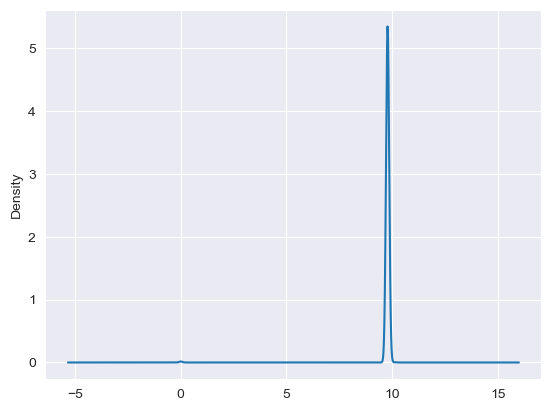

In [97]:
temp.eficiencia.plot.density();

Vemos que no, aquí todos los inverters tienen una eficiencia constante (aunque muy baja)

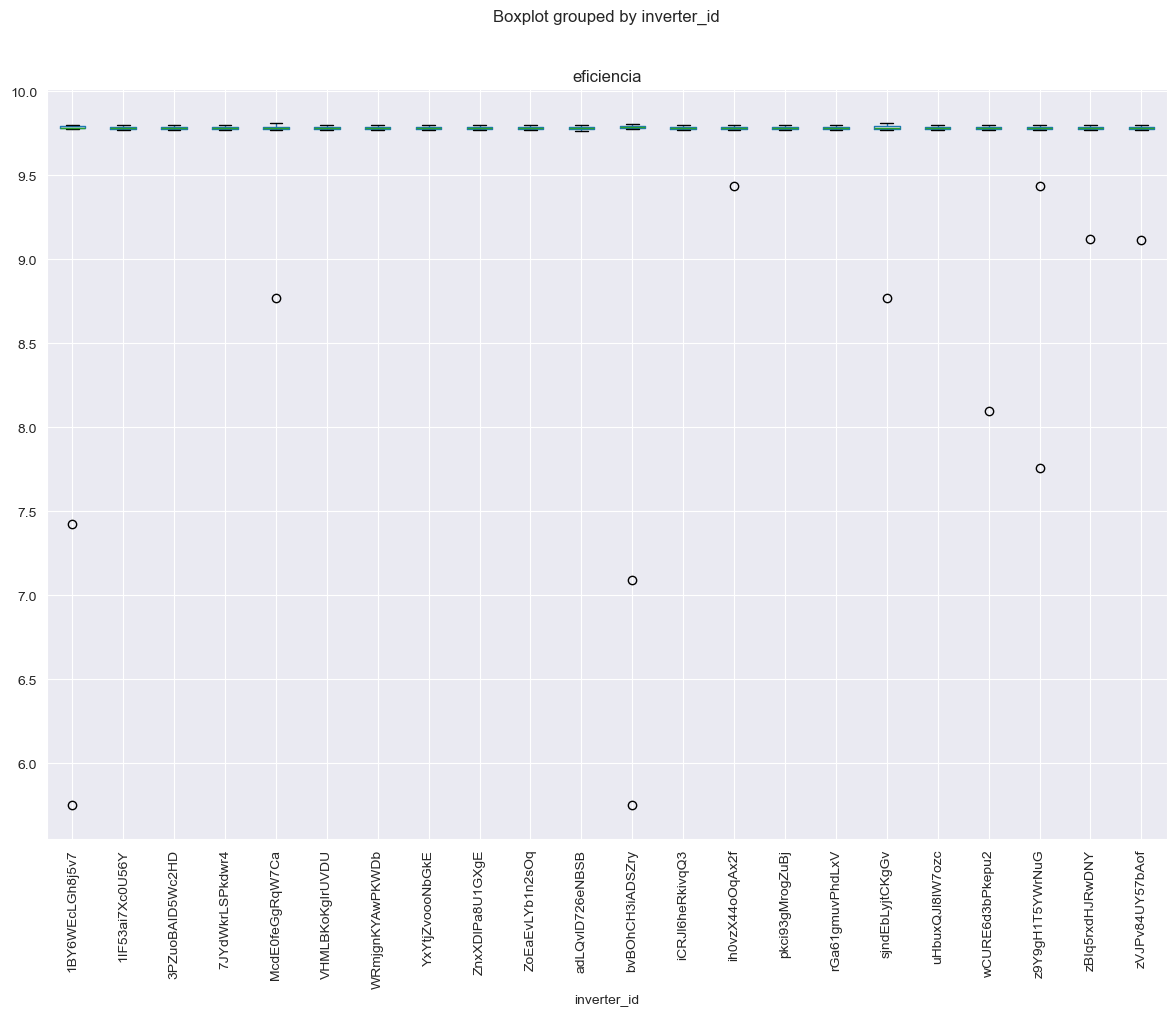

In [98]:
temp.groupby(['inverter_id','date'],as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

Vemos que salvo días puntuales en algunos inverters en el resto la eficiencia es constante.

Vamos a revisar la eficiencia media diaria por cada inverter.

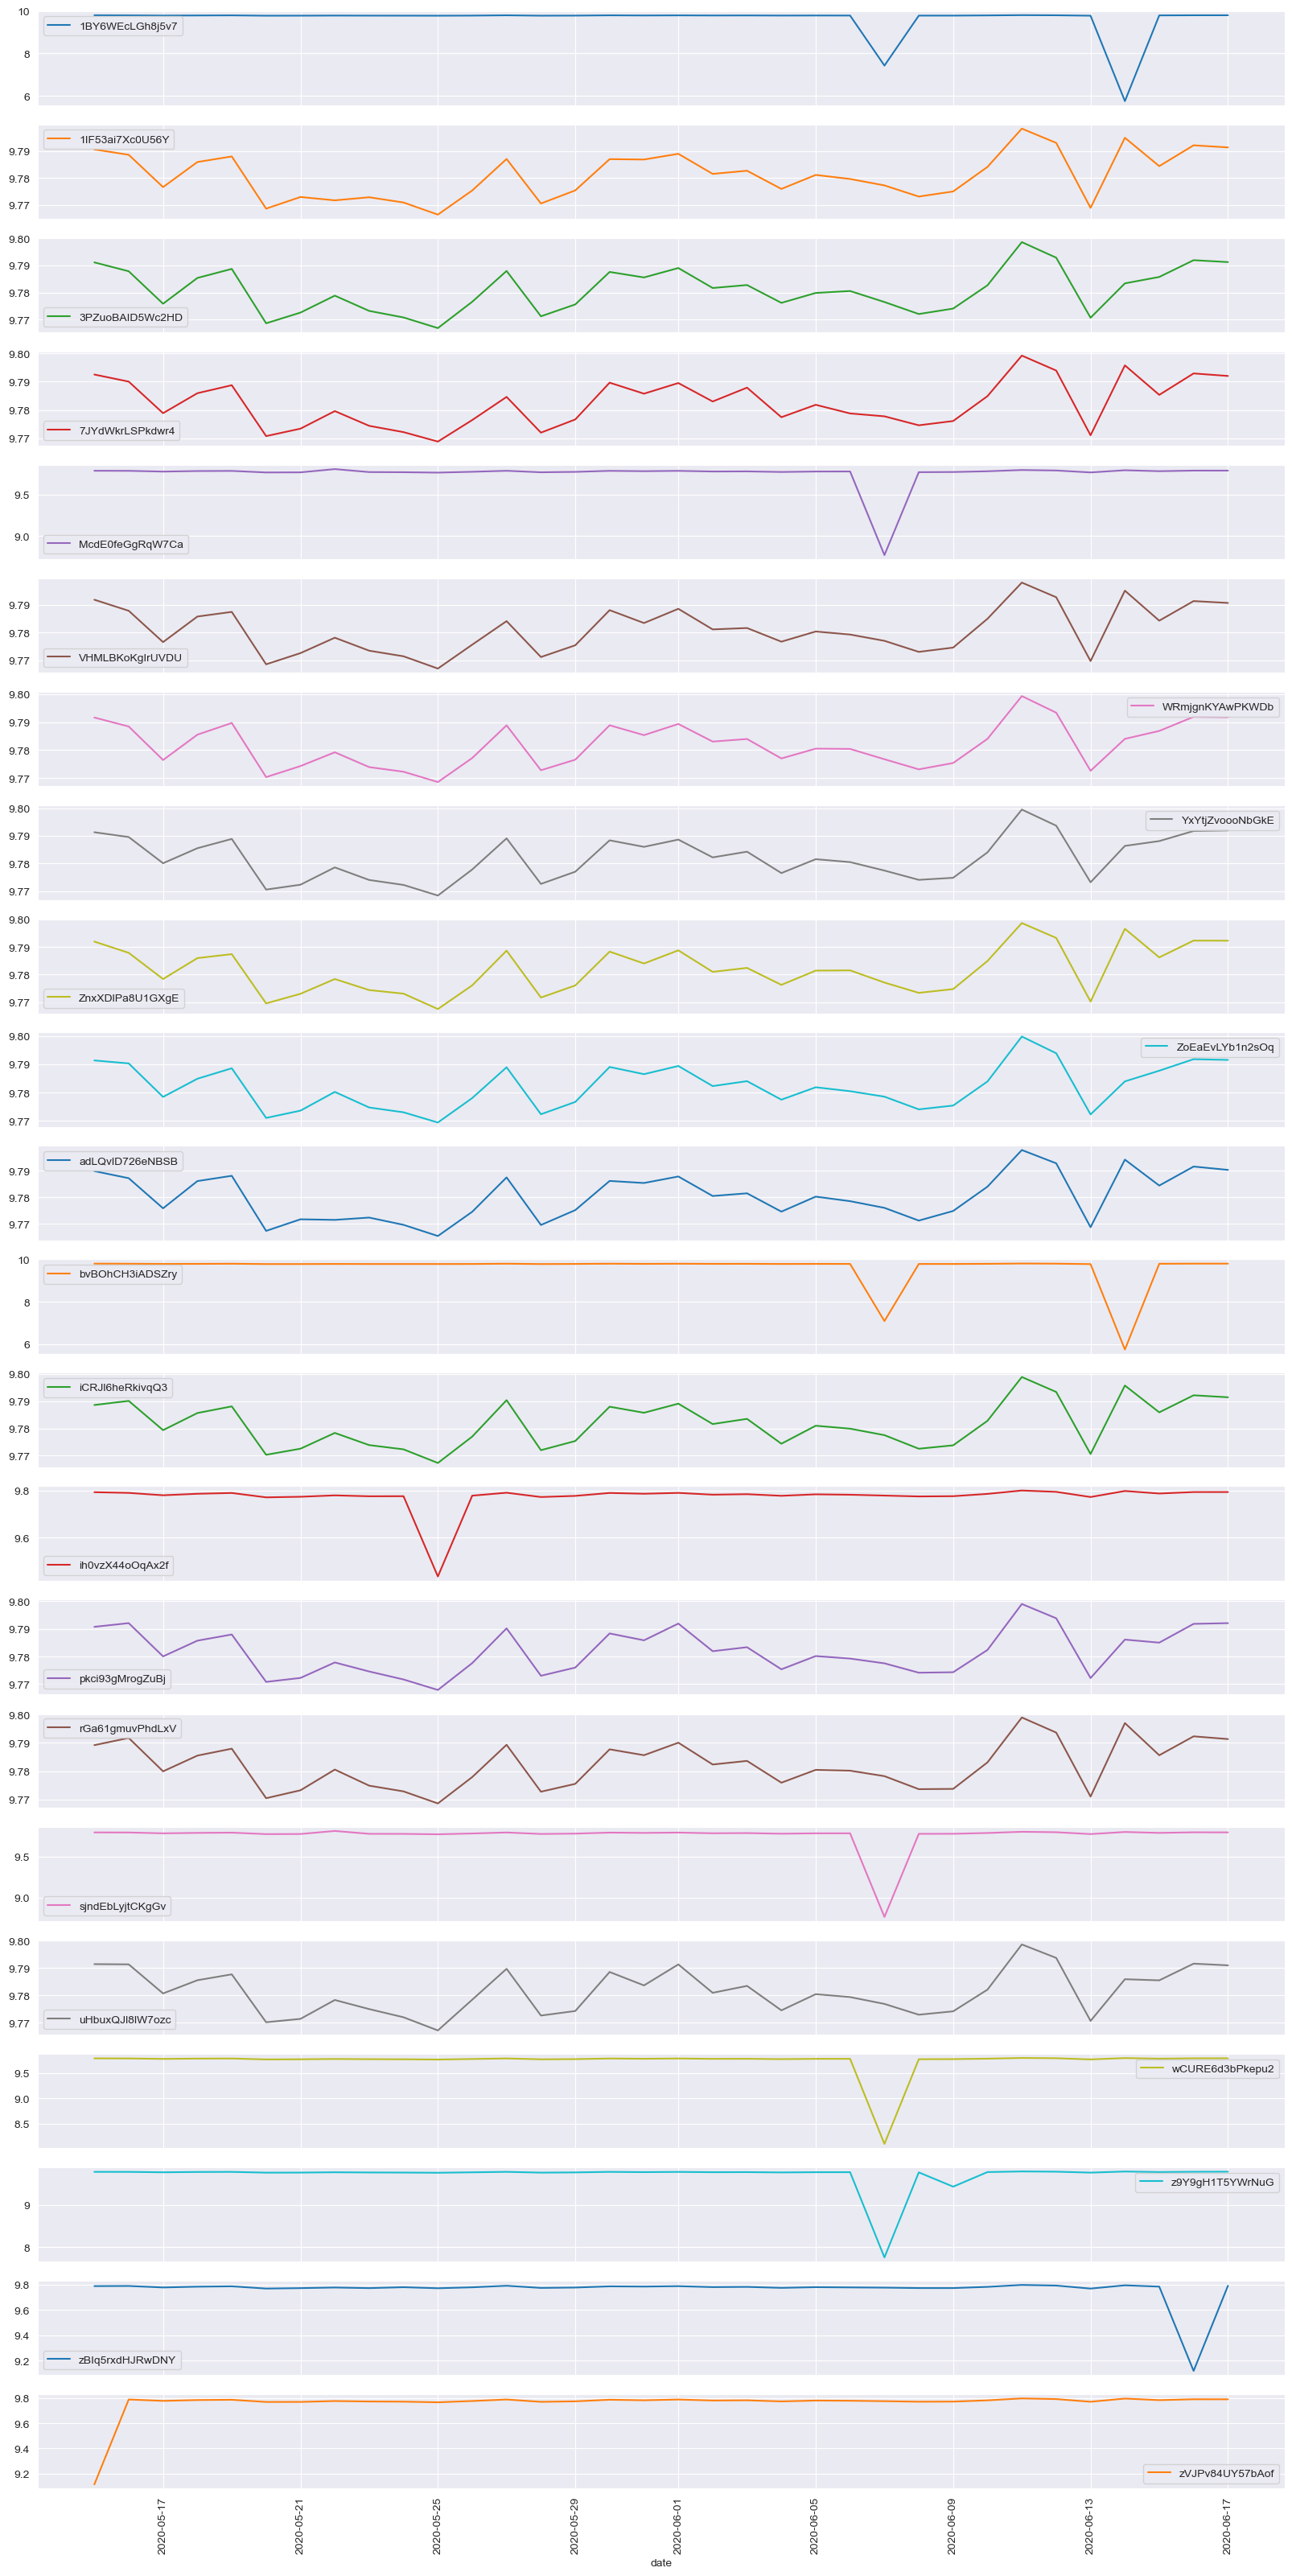

In [99]:
temp.groupby(['inverter_id','date']).eficiencia.mean().unstack(level = 0).plot(subplots = True, sharex=True, figsize=(20,40))
plt.xticks(rotation = 90);

En el análisis por inverter vemos de nuevo que todos los datos son constantes.

Vamos a comprobar que entonces no hay fallos en la generación de DC.

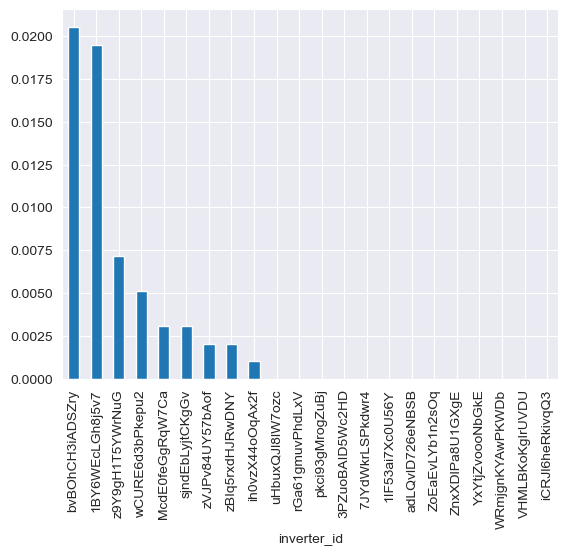

In [100]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar();

Vemos que aunque hay algunos inverters que han tenido fallos su magnitud es inferior al 2% de las mediciones.

Por tanto la generación de DC en la planta 1 sí es correcta, y el fallo está en la transformación de DC a AC.

## CONCLUSIONES

Tras un ananálisis de los datos podemos concluir que:
    
* Existen graves problemas de calidad de datos. Se debería revisar en qué parte de la cadena se generan estos problemas, incluyendo los medidores de las plantas.
* El hecho de que la generación en DC sea unas 10 veces superior en la planta 1 que en la 2, sumado al hecho de que la eficiencia en la planta 1 esté sobre el 10% nos lleva a pensar que el dato de generación de DC en la planta 1 puede estar artificialmente escalado por algún motivo.
* Pero de momento a falta de comprobación vamos a asumir que los datos son correctos.
* La dos plantas han recibido altas cantidades de irradiación, no hemos localizado ningún problema en esta fase
* Aunque la temperatura ambiente es superior en la planta 2 y sus módulos se calientan más que los de la planta 1 esto no parece tener un impacto significativo
* La generación de DC de la planta 1 funciona bien, los módulos parecen llevar DC a los inverters.
* La generación de DC de la planta 2 NO funciona bien, algunos módulos llevan muy poco DC a los inverters incluso en las horas de mayor irradiación.
* La transformación de DC a AC de la planta 1 NO funciona bien, solo se transforma en torno al 10%, eso sí, de forma constante. Y esta baja eficiencia no es debida a momentos de no recepción de DC ni se concentra en inverters concretos, si no que parece más estructural (de nuevo tener en cuenta que podría deberse a un problema de calidad de datos en kw_dc de la planta 1
* La transformación de DC a AC de la planta 2 funciona bien, ya que una vez eliminados los períodos de generación cero de DC el resto tienen una eficiencia superior al 97%

Recomendaciones:

* Revisar la captación de datos y su fiabilidad
* Revisión de mantenimiento en los módulos de los inverters  de la planta 2 en los que hay muchos momentos de generación cero de DC
* Revisión de mantenimiento de los inverters de la Planta 1